<h1 align="center">K-Nearest Neighbour Classification</h1>

In [413]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier

In [414]:
from sklearn.model_selection import train_test_split

In [415]:
from sklearn.metrics import confusion_matrix

In [416]:
from sklearn.metrics import classification_report

In [417]:
from sklearn.datasets import load_iris

In [418]:
iris=load_iris()

In [419]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

# 2D dataset format

In [420]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [421]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [422]:
df["target"]=iris.target

In [423]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [424]:
df["Flower"]=df.target.apply(lambda x: iris.target_names[x])
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


# splitting data and testing 

In [425]:
x=df.drop(['target','Flower'],axis=1)

In [426]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [427]:
y=df.target

In [428]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

# Train Test Split

In [429]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# Data segentation

In [430]:
df1=df[df.target==0]
df2=df[df.target==1]
df3=df[df.target==2]

In [431]:
df1.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa


In [432]:
df2.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor


In [433]:
df3.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica


# Visualization of Clusters

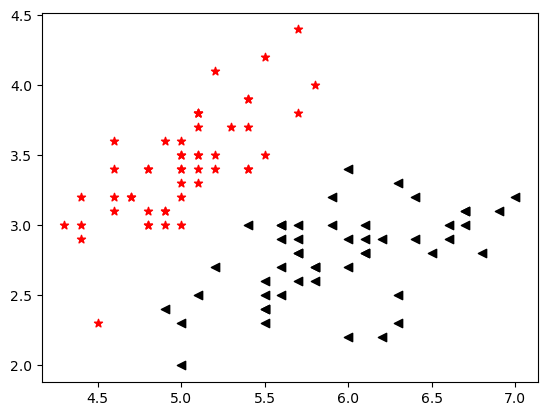

In [434]:
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],marker="*",color="red")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],marker="<",color="black")

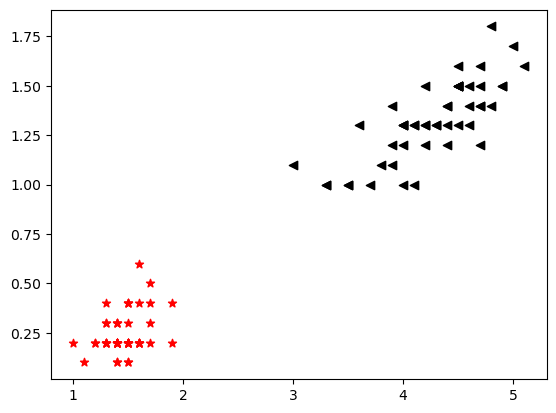

In [435]:
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],marker="*",color="red")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],marker="<",color="black")

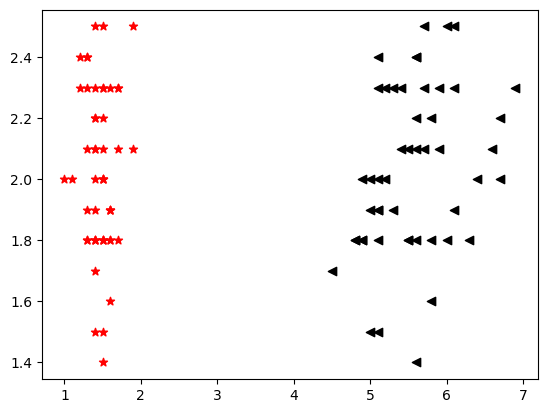

In [436]:
plt.scatter(df1["petal length (cm)"],df3["petal width (cm)"],marker="*",color="red")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],marker="<",color="black")

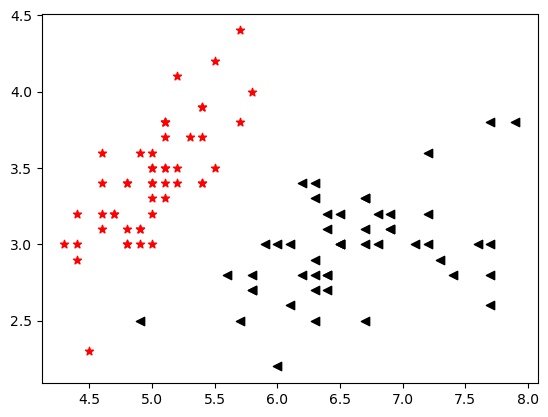

In [437]:
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],marker="*",color="red")
plt.scatter(df3["sepal length (cm)"],df3["sepal width (cm)"],marker="<",color="black")

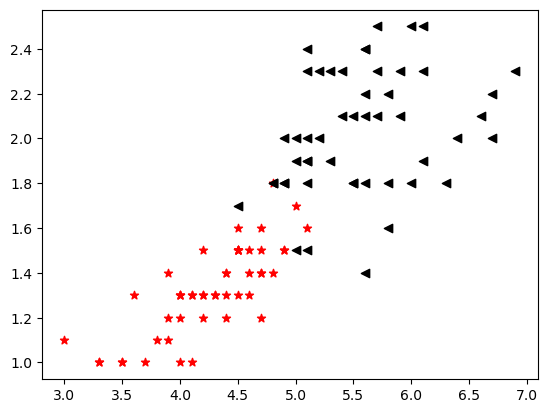

In [438]:
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],marker="*",color="red")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],marker="<",color="black")

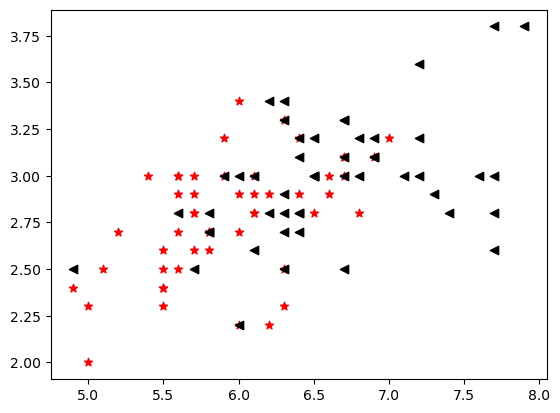

In [439]:
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],marker="*",color="red")
plt.scatter(df3["sepal length (cm)"],df3["sepal width (cm)"],marker="<",color="black")

 # Lets Fit KNN model to classify Each Species

In [440]:
knn=KNeighborsClassifier(n_neighbors=3)

In [441]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [442]:
knn.score(x_test,y_test)

1.0

In [443]:
y_predicted=knn.predict(x_test)

In [444]:
y_predicted

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

# Check Trail an Error Using COnfuction Matrix

In [445]:
cm=confusion_matrix(y_test,y_predicted)

In [446]:
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

# Visualize Confusion Metrix

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


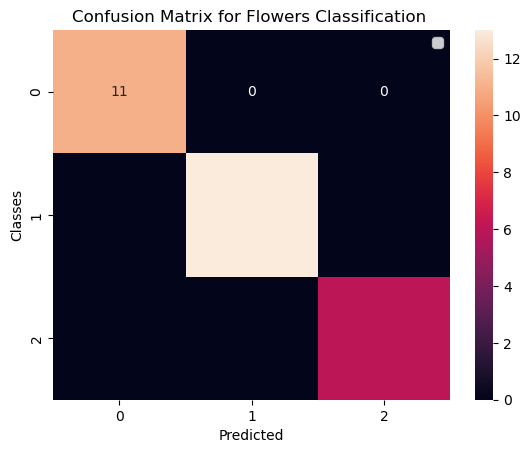

In [447]:
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix for Flowers Classification ")
plt.xlabel("Predicted")
plt.ylabel("Classes")
plt.legend()
plt.show()


# Classification Report

In [448]:
cr=classification_report(y_test,y_predicted)

In [449]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Lets check new Classified Dataset after KNN fittinf

In [450]:
df["target"]=knn.predict(x)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [451]:
df1=df[df.target==0]
df2=df[df.target==1]
df3=df[df.target==2]

In [452]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

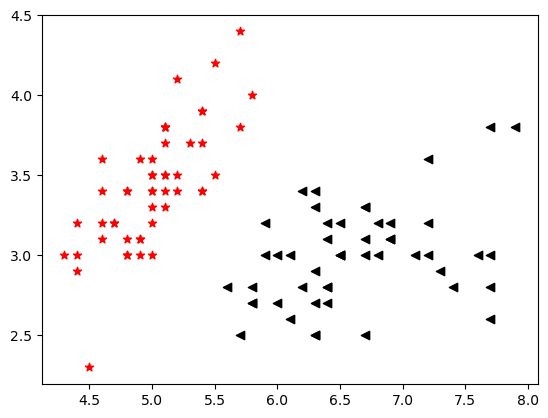

In [453]:
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],marker="*",color="red")
plt.scatter(df3["sepal length (cm)"],df3["sepal width (cm)"],marker="<",color="black")

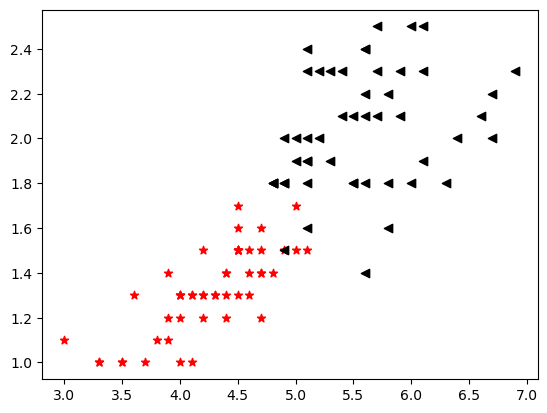

In [455]:
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],marker="*",color="red")
plt.scatter(df3["petal length (cm)"],df3["petal width (cm)"],marker="<",color="black")

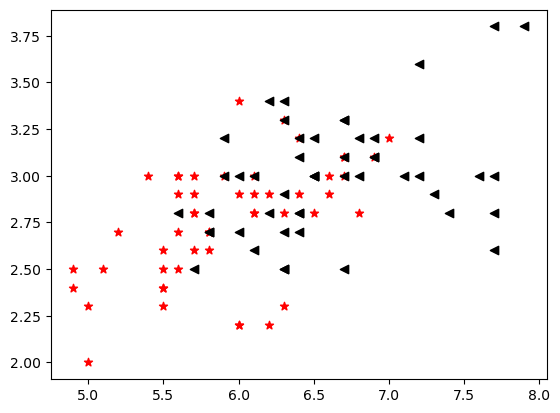

In [456]:
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],marker="*",color="red")
plt.scatter(df3["sepal length (cm)"],df3["sepal width (cm)"],marker="<",color="black")